# Diabities Prediction

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [126]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [127]:
df.shape

(768, 9)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [129]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [130]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [131]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [132]:
# here the value of  Glucose , Insulin, skin thickenss, BMI and Blood Pressure can not be 0.

df['Glucose'] = df['Glucose'].replace(0 , df['Glucose'].mean())

df['Insulin'] = df['Insulin'].replace(0 , df['Insulin'].mean())

df['SkinThickness'] = df['SkinThickness'].replace(0 , df['SkinThickness'].mean())

df['BMI'] = df['BMI'].replace(0 , df['BMI'].mean())

df['BloodPressure'] = df['BloodPressure'].replace(0 , df['BloodPressure'].mean())


<Axes: >

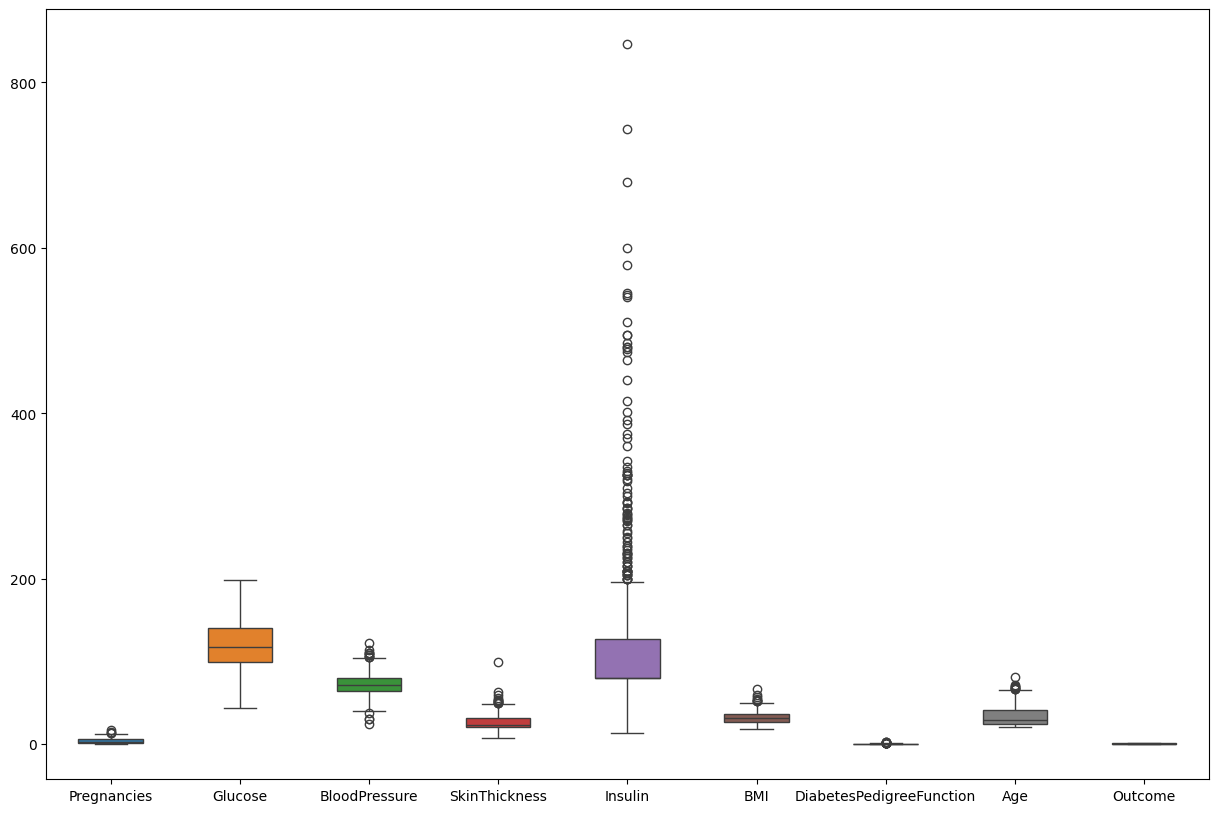

In [133]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df , width=0.5)

In [134]:
# outliers removing
new_df = df[df['Insulin'] < df['Insulin'].quantile(0.9)]

<Axes: >

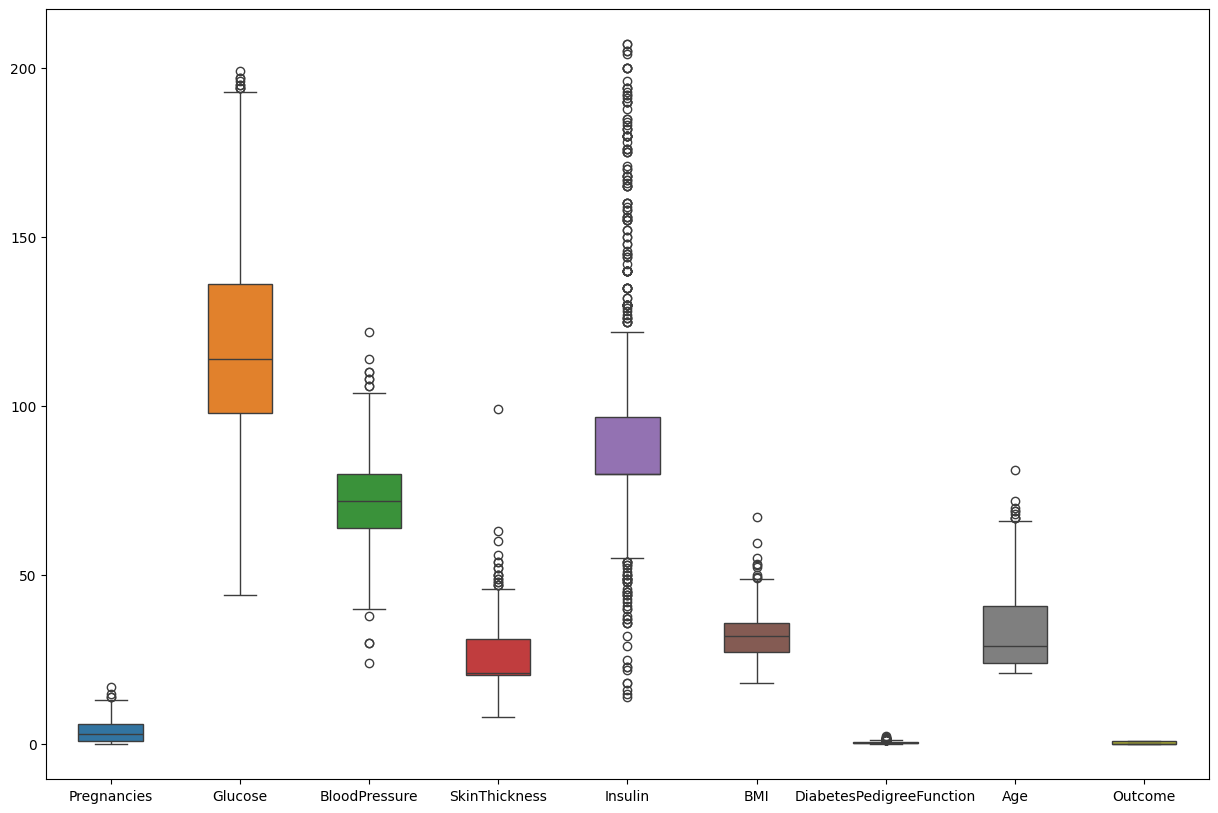

In [135]:
plt.figure(figsize=(15,10))
sns.boxplot(data=new_df , width=0.5)

In [136]:
new_df.shape

(688, 9)

In [137]:
# input and output data

x = new_df.iloc[: , :-1]
y = new_df['Outcome']

In [138]:
# train , test , split

x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.25 , random_state=42) 

x_train.shape , x_test.shape

((516, 8), (172, 8))

In [139]:
# scaling the data

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [140]:
# scaling train and test data
x_train = scalar.fit_transform(x_train)

x_test = scalar.fit_transform(x_test)

In [141]:
# saving the model
import pickle , bz2
file = bz2.BZ2File('../model/scaling.pkl','wb')
pickle.dump(scalar,file)
file.close()

# Model Training

<Axes: >

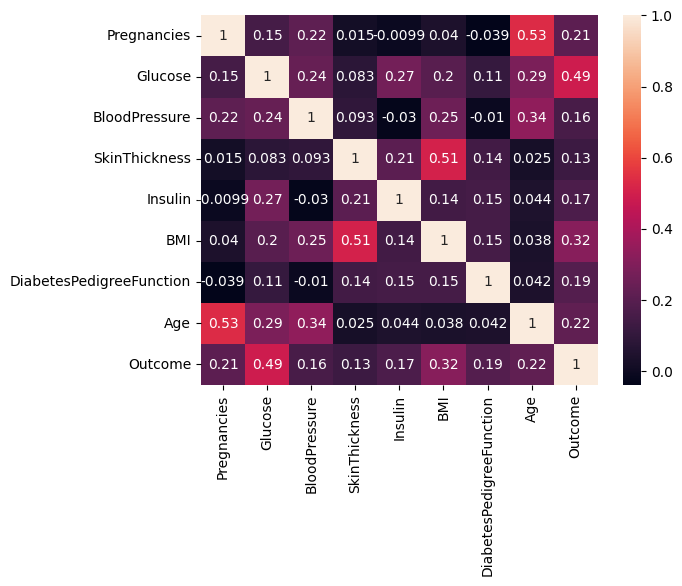

In [142]:
sns.heatmap(new_df.corr() , annot=True)

# 1. Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [144]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [145]:
y_pred_log= log_reg.predict(x_test)

In [146]:
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

print("Accuracy score is : ",accuracy_score(y_test , y_pred_log)*100)

print("================================================")

print("Confusion matrix is : " ,confusion_matrix(y_test , y_pred_log) )

print("================================================")

print("Classification report is : " , classification_report(y_test , y_pred_log))


Accuracy score is :  80.81395348837209
Confusion matrix is :  [[107  13]
 [ 20  32]]
Classification report is :                precision    recall  f1-score   support

           0       0.84      0.89      0.87       120
           1       0.71      0.62      0.66        52

    accuracy                           0.81       172
   macro avg       0.78      0.75      0.76       172
weighted avg       0.80      0.81      0.80       172



# 2. Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
randm_clf = RandomForestClassifier(n_estimators=150 , max_depth=8 , criterion='entropy' , max_features='log2' )

In [148]:
randm_clf.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=150)

In [149]:
y_pred_randm= randm_clf.predict(x_test)

In [150]:
print("Accuracy score is : ",accuracy_score(y_test , y_pred_randm)*100)

print("================================================")

print("Confusion matrix is : " ,confusion_matrix(y_test , y_pred_randm) )

print("================================================")

print("Classification report is : " , classification_report(y_test , y_pred_randm))

Accuracy score is :  81.3953488372093
Confusion matrix is :  [[112   8]
 [ 24  28]]
Classification report is :                precision    recall  f1-score   support

           0       0.82      0.93      0.88       120
           1       0.78      0.54      0.64        52

    accuracy                           0.81       172
   macro avg       0.80      0.74      0.76       172
weighted avg       0.81      0.81      0.80       172



In [151]:
# hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV

randm_params = {
    "n_estimators" : [i for i in range(1,200)],
    "criterion":['gini', 'entropy', 'log_loss'] ,
    "max_depth": [i for i in range(1,15)],
    "max_features":['sqrt', 'log2'],
}

randm_search_cv = RandomizedSearchCV(RandomForestClassifier() , param_distributions=randm_params )

randm_search_cv.fit(x_train , y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [152]:
randm_search_cv.best_params_

{'n_estimators': 54,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'log_loss'}

# 3. Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=16 , max_features='log2' , splitter='best' )


In [154]:
dt_clf.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features='log2')

In [155]:
y_pred_dt= dt_clf.predict(x_test)

In [156]:
print("Accuracy score is : ",accuracy_score(y_test , y_pred_dt)*100)

print("================================================")

print("Confusion matrix is : " ,confusion_matrix(y_test , y_pred_dt) )

print("================================================")

print("Classification report is : " , classification_report(y_test , y_pred_dt))

Accuracy score is :  73.25581395348837
Confusion matrix is :  [[109  11]
 [ 35  17]]
Classification report is :                precision    recall  f1-score   support

           0       0.76      0.91      0.83       120
           1       0.61      0.33      0.42        52

    accuracy                           0.73       172
   macro avg       0.68      0.62      0.63       172
weighted avg       0.71      0.73      0.70       172



In [157]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

dt_params = {
    'criterion':['gini','entropy'],
    'max_depth' :  [i for i in range(1,20)],
    'splitter' : ['best','radom'],
    'max_features':['auto','sqrt','log2']
}

dt_search_cv = RandomizedSearchCV(DecisionTreeClassifier() , param_distributions=dt_params , n_iter=5)

dt_search_cv.fit(x_train , y_train)

C:\Users\rojas\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rojas\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rojas\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\rojas\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validat

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'radom']})

In [158]:
dt_search_cv.best_params_

{'splitter': 'best',
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'entropy'}

# 4. KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [160]:
y_pred_knn= knn.predict(x_test)

In [161]:
print("Accuracy score is : ",accuracy_score(y_test , y_pred_knn)*100)

print("================================================")

print("Confusion matrix is : " ,confusion_matrix(y_test , y_pred_knn) )

print("================================================")

print("Classification report is : " , classification_report(y_test , y_pred_knn))

Accuracy score is :  75.5813953488372
Confusion matrix is :  [[100  20]
 [ 22  30]]
Classification report is :                precision    recall  f1-score   support

           0       0.82      0.83      0.83       120
           1       0.60      0.58      0.59        52

    accuracy                           0.76       172
   macro avg       0.71      0.71      0.71       172
weighted avg       0.75      0.76      0.75       172



In [162]:
from sklearn.svm import SVC
svc = SVC(probability=True , gamma=0.01 , kernel='sigmoid', C=1)

In [163]:
svc.fit(x_train , y_train)

SVC(C=1, gamma=0.01, kernel='sigmoid', probability=True)

In [164]:
y_pred_svc= svc.predict(x_test)

print("Accuracy score is : ",accuracy_score(y_test , y_pred_svc)*100)

print("================================================")

print("Confusion matrix is : " ,confusion_matrix(y_test , y_pred_svc) )

print("================================================")

print("Classification report is : " , classification_report(y_test , y_pred_svc))

Accuracy score is :  84.30232558139535
Confusion matrix is :  [[114   6]
 [ 21  31]]
Classification report is :                precision    recall  f1-score   support

           0       0.84      0.95      0.89       120
           1       0.84      0.60      0.70        52

    accuracy                           0.84       172
   macro avg       0.84      0.77      0.80       172
weighted avg       0.84      0.84      0.83       172



In [165]:
model = svc

In [166]:
import bz2
file = bz2.BZ2File('../model/svcmodel.pkl' , 'wb')
pickle.dump(svc ,file)
file.close()

In [167]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(accuracy_score(y_test , y_pred_log),4), 100*round(accuracy_score(y_test , y_pred_knn),4), 100*round(accuracy_score(y_test , y_pred_svc),4), 100*round(accuracy_score(y_test , y_pred_dt),4), 100*round(accuracy_score(y_test , y_pred_randm),4)
            ]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,84.30
4,Random Forest Classifier,81.40
0,Logistic Regression,80.81
1,KNN,75.58
3,Decision Tree Classifier,73.26
